## **Práctica 17 (Ejercicio): Clasificación con SVM**

Nombre:

No. Cuenta:

Email:

### **Caso de estudio**

Estudios clínicos a partir de imágenes digitalizadas de pacientes con cáncer de mama de Wisconsin (WDBC, Wisconsin Diagnostic Breast Cancer).

**Objetivo.** Clasificar registros clínicos de tumores malignos y benignos de cancer de mama a partir de imágenes digitalizadas.

**Fuente de datos:**

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [ ]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline

### **I. Acceso a datos y selección de características**

#### **1) Acceso a los datos**

In [ ]:
from google.colab import files
files.upload()

Saving WDBCOriginal.csv to WDBCOriginal.csv


{'WDBCOriginal.csv': b'\xef\xbb\xbfIDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension\r\nP-842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871\r\nP-842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667\r\nP-84300903,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999\r\nP-84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744\r\nP-84358402,M,20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,0.05883\r\nP-843786,M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,0.07613\r\nP-844359,M,18.25,19.98,119.6,1040,0.09463,0.109,0.1127,0.074,0.1794,0.05742\r\nP-84458202,M,13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451\r\nP-844981,M,13,21.82,87.5,519.8,0.1273,0.1932,0.1859,0.09353,0.235,0.07389\r\nP-84501001,M,12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.08543,0.203,0.08243\r\nP-845636,M,16.02,23.24,102.7,79

In [ ]:
BCancer = pd.read_csv('WDBCOriginal.csv')
BCancer

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
0,P-842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,P-842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,P-84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,P-84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,P-84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,P-926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,P-927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [ ]:
print(BCancer.groupby('Diagnosis').size())

Diagnosis
B    357
M    212
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  


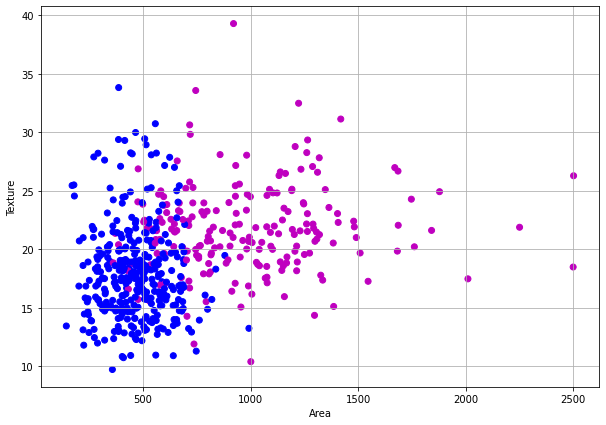

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(BCancer['Area'], BCancer['Texture'], c = BCancer.Diagnosis)
plt.grid()
plt.xlabel('Area')
plt.ylabel('Texture')
plt.show()

#### **2) Selección de características**

Se hace uso de un mapa de calor con el propósito de identificar variables correlacionadas.

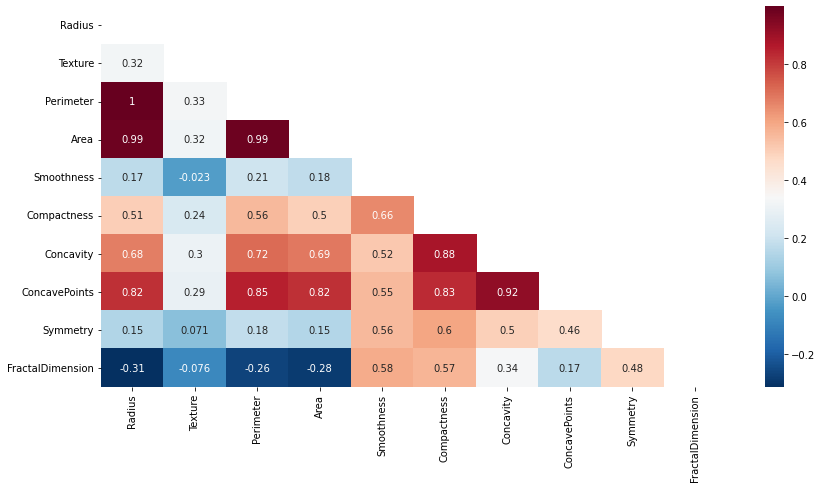

In [ ]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(BCancer.corr())
sns.heatmap(BCancer.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

**Varibles seleccionadas:**

1) Textura [Posición 3]

2) Area [Posición 5]

3) Smoothness [Posición 6]

4) Compactness [Posición 7]

5) Symmetry [Posición 10]

6) FractalDimension [Posición 11]

#### **3) Definición de las variables predictoras y variable clase**


In [ ]:
BCancer = BCancer.replace({'M': -1, 'B': 1})
BCancer

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
0,P-842302,-1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,P-842517,-1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,P-84300903,-1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,P-84348301,-1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,P-84358402,-1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,-1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,P-926682,-1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,P-926954,-1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,P-927241,-1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [ ]:
print(BCancer.groupby('Diagnosis').size())

Diagnosis
-1    212
 1    357
dtype: int64


In [ ]:
#Variables predictoras
X = np.array(BCancer[['Texture', 
                      'Area', 
                      'Smoothness', 
                      'Compactness', 
                      'Symmetry', 
                      'FractalDimension']])
pd.DataFrame(X)

,0,1,2,3,4,5
0,10.38,1001.0,0.11840,0.27760,0.2419,0.07871
1,17.77,1326.0,0.08474,0.07864,0.1812,0.05667
2,21.25,1203.0,0.10960,0.15990,0.2069,0.05999
3,20.38,386.1,0.14250,0.28390,0.2597,0.09744
4,14.34,1297.0,0.10030,0.13280,0.1809,0.05883
...,...,...,...,...,...,...
564,22.39,1479.0,0.11100,0.11590,0.1726,0.05623
565,28.25,1261.0,0.09780,0.10340,0.1752,0.05533
566,28.08,858.1,0.08455,0.10230,0.1590,0.05648
567,29.33,1265.0,0.11780,0.27700,0.2397,0.07016


In [ ]:
#Variable clase
Y = np.array(BCancer[['Diagnosis']])
pd.DataFrame(Y)

,0
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
564,-1
565,-1
566,-1
567,-1


### **II. Aplicación del algoritmo: Máquina de soporte vactorial (SVM)**

Las funciones nativas de Scikit-learn para SVM son: "linear", "poly", "rbf" y "sigmoid"

In [ ]:
from sklearn.svm import SVC                         #Support vector classifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import model_selection

In [ ]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                                                                test_size = 0.2, 
                                                                                random_state = 0,
                                                                                shuffle = True)

In [ ]:
print(len(X_train))
print(len(X_validation))

455
114


#### **1) Modelo: SVM Lineal**

In [ ]:
#Se declara el tipo de kernel y se entrena el modelo
ModeloSVM_1 = SVC(kernel='linear')
ModeloSVM_1.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

Se generan las clasificaciones

In [ ]:
Clasificaciones_1 = ModeloSVM_1.predict(X_validation)
print(Clasificaciones_1)
#pd.DataFrame(Clasificaciones_1)

[ 1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1 -1 -1 -1  1 -1  1  1
 -1  1  1 -1  1 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1  1 -1  1  1 -1  1  1
  1 -1 -1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1 -1 -1 -1  1  1 -1
  1 -1 -1  1  1  1  1  1 -1 -1 -1  1 -1  1  1  1 -1 -1  1  1 -1 -1  1  1
 -1  1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1]


In [ ]:
Clasificaciones = pd.DataFrame(Y_validation, Clasificaciones_1)
Clasificaciones

,0
1,-1
1,1
1,1
1,1
1,1
...,...
-1,-1
1,1
-1,-1
-1,-1


In [ ]:
#Se calcula la exactitud promedio de la validación
ModeloSVM_1.score(X_validation, Y_validation)

0.9122807017543859

#### **Validación del modelo**

In [ ]:
#Matriz de clasificación
Clasificaciones_1 = ModeloSVM_1.predict(X_validation)
Matriz_Clasificacion = pd.crosstab(Y_validation.ravel(), 
                                   Clasificaciones_1, 
                                   rownames=['Real'], 
                                   colnames=['Clasificación']) 
Matriz_Clasificacion


Clasificación,-1,1
Real,,
-1,41,6
1,4,63


In [ ]:
#Reporte de la clasificación
print("Exactitud", ModeloSVM_1.score(X_validation, Y_validation))
print(classification_report(Y_validation, Clasificaciones_1))

Exactitud 0.9122807017543859
              precision    recall  f1-score   support

          -1       0.91      0.87      0.89        47
           1       0.91      0.94      0.93        67

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [ ]:
VectoresSoporte_1 = ModeloSVM_1.support_vectors_
pd.DataFrame(VectoresSoporte_1)

,0,1,2,3,4,5
0,23.12,609.9,0.10750,0.24130,0.2384,0.07542
1,19.07,701.9,0.09215,0.08597,0.1561,0.05915
2,23.94,668.3,0.11720,0.14790,0.1953,0.06654
3,24.69,572.6,0.09258,0.07862,0.1761,0.06130
4,19.97,744.7,0.11600,0.15620,0.1929,0.06744
...,...,...,...,...,...,...
116,19.34,659.7,0.08388,0.07800,0.1473,0.05746
117,24.44,406.4,0.12360,0.15520,0.2131,0.07405
118,16.85,666.0,0.08641,0.06698,0.1409,0.05355
119,18.89,558.1,0.10590,0.11470,0.1806,0.06079


In [ ]:
#Vectores de soporte
print('Número de vectores de soporte: \n', ModeloSVM_1.n_support_)
print('Vectores de soporte: \n', ModeloSVM_1.support_)

Número de vectores de soporte: 
 [60 61]
Vectores de soporte: 
 [  8  23  41  43  45  52  65  69  78  85 106 108 113 123 131 134 135 138
 142 165 177 179 182 186 208 214 216 223 224 228 241 247 250 259 266 282
 289 290 315 321 328 333 336 338 339 341 354 362 381 400 401 403 406 408
 411 413 421 435 436 451   2  19  22  37  39  54  55  68  72 103 110 116
 141 149 153 157 168 171 176 192 195 207 209 210 213 217 218 230 231 233
 236 239 244 264 268 278 284 287 299 312 314 322 335 345 346 356 384 386
 396 397 410 422 429 430 433 434 437 441 445 447 448]


#### **2) Modelo: SVM Polinomial**

In [ ]:
#Se declara el tipo de kernel y se entrena el modelo
ModeloSVM_2 = SVC(kernel='poly')
ModeloSVM_2.fit(X_train, Y_train)

#Predeterminado: degree=3

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly')

In [ ]:
Clasificaciones_2 = ModeloSVM_2.predict(X_validation)
print(Clasificaciones_2)
#pd.DataFrame(Clasificaciones_2)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1 -1 -1 -1  1 -1  1  1
 -1  1  1  1  1 -1  1 -1  1 -1  1  1  1 -1  1  1  1  1 -1  1  1 -1  1  1
  1  1 -1  1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1 -1 -1 -1  1  1 -1
  1  1 -1  1  1  1  1  1 -1 -1 -1  1 -1  1  1  1 -1 -1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1 -1  1 -1  1 -1 -1  1 -1 -1  1]


In [ ]:
#Se calcula la exactitud promedio de la validación
ModeloSVM_2.score(X_validation, Y_validation)

0.8859649122807017

#### **Validación del modelo**

In [ ]:
#Matriz de clasificación
Clasificaciones_2 = ModeloSVM_2.predict(X_validation)
Matriz_Clasificacion = pd.crosstab(Y_validation.ravel(), 
                                   Clasificaciones_2, 
                                   rownames=['Real'], 
                                   colnames=['Clasificación']) 
Matriz_Clasificacion

Clasificación,-1,1
Real,,
-1,35,12
1,1,66


In [ ]:
#Reporte de la clasificación
print("Exactitud", ModeloSVM_2.score(X_validation, Y_validation))
print(classification_report(Y_validation, Clasificaciones_2))

Exactitud 0.8859649122807017
              precision    recall  f1-score   support

          -1       0.97      0.74      0.84        47
           1       0.85      0.99      0.91        67

    accuracy                           0.89       114
   macro avg       0.91      0.86      0.88       114
weighted avg       0.90      0.89      0.88       114



In [ ]:
VectoresSoporte_2 = ModeloSVM_2.support_vectors_
pd.DataFrame(VectoresSoporte_2)

,0,1,2,3,4,5
0,23.12,609.9,0.10750,0.24130,0.2384,0.07542
1,19.07,701.9,0.09215,0.08597,0.1561,0.05915
2,23.94,668.3,0.11720,0.14790,0.1953,0.06654
3,24.69,572.6,0.09258,0.07862,0.1761,0.06130
4,19.97,744.7,0.11600,0.15620,0.1929,0.06744
...,...,...,...,...,...,...
131,19.13,575.3,0.09057,0.11470,0.1848,0.06181
132,18.77,689.5,0.08138,0.11670,0.1744,0.06493
133,19.34,659.7,0.08388,0.07800,0.1473,0.05746
134,16.85,666.0,0.08641,0.06698,0.1409,0.05355


In [ ]:
#Vectores de soporte
print('Número de vectores de soporte: \n', ModeloSVM_2.n_support_)
print('Vectores de soporte: \n', ModeloSVM_2.support_)

Número de vectores de soporte: 
 [68 68]
Vectores de soporte: 
 [  8  23  41  43  45  52  65  69  78  85 106 108 113 123 131 133 134 135
 136 138 142 165 177 179 182 186 208 214 216 223 224 241 247 250 254 259
 266 273 282 289 290 308 315 321 328 332 333 336 338 339 341 354 361 362
 363 381 400 401 403 406 408 411 413 421 423 435 436 451   2  12  22  32
  35  37  42  54  68  72  84 103 105 110 116 118 141 143 153 159 168 171
 184 185 192 195 210 213 217 218 225 230 233 236 244 264 275 283 287 302
 307 310 312 314 317 322 335 342 345 346 351 356 373 384 386 394 395 396
 397 410 414 422 430 433 434 437 445 448]


#### **3) Modelo: SVM RBF -Función de Base Radial-**

In [ ]:
#Se declara el tipo de kernel y se entrena el modelo
ModeloSVM_3 = SVC(kernel='rbf')
ModeloSVM_3.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
Clasificaciones_3 = ModeloSVM_3.predict(X_validation)
print(Clasificaciones_3)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1 -1 -1  1 -1  1  1
 -1  1  1  1  1 -1  1 -1  1 -1  1  1  1 -1  1  1  1  1 -1  1  1 -1  1  1
  1  1 -1  1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1 -1 -1 -1  1  1 -1
  1  1 -1  1  1  1  1  1 -1 -1 -1  1 -1  1  1  1 -1 -1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1 -1  1 -1  1 -1 -1  1 -1 -1  1]


In [ ]:
#Se calcula la exactitud promedio de la validación
ModeloSVM_3.score(X_validation, Y_validation)

0.8771929824561403

#### **Validación del modelo**

In [ ]:
#Matriz de clasificación
Clasificaciones_3 = ModeloSVM_3.predict(X_validation)
Matriz_Clasificacion = pd.crosstab(Y_validation.ravel(), 
                                   Clasificaciones_3, 
                                   rownames=['Real'], 
                                   colnames=['Clasificación']) 
Matriz_Clasificacion

Clasificación,-1,1
Real,,
-1,34,13
1,1,66


In [ ]:
#Reporte de la clasificación
print("Exactitud", ModeloSVM_3.score(X_validation, Y_validation))
print(classification_report(Y_validation, Clasificaciones_3))

Exactitud 0.8771929824561403
              precision    recall  f1-score   support

          -1       0.97      0.72      0.83        47
           1       0.84      0.99      0.90        67

    accuracy                           0.88       114
   macro avg       0.90      0.85      0.87       114
weighted avg       0.89      0.88      0.87       114



In [ ]:
VectoresSoporte_3 = ModeloSVM_3.support_vectors_
pd.DataFrame(VectoresSoporte_3)

,0,1,2,3,4,5
0,23.12,609.9,0.10750,0.24130,0.2384,0.07542
1,19.07,701.9,0.09215,0.08597,0.1561,0.05915
2,20.20,857.6,0.07497,0.07112,0.1846,0.05325
3,23.94,668.3,0.11720,0.14790,0.1953,0.06654
4,24.69,572.6,0.09258,0.07862,0.1761,0.06130
...,...,...,...,...,...,...
140,18.77,689.5,0.08138,0.11670,0.1744,0.06493
141,19.34,659.7,0.08388,0.07800,0.1473,0.05746
142,16.85,666.0,0.08641,0.06698,0.1409,0.05355
143,18.89,558.1,0.10590,0.11470,0.1806,0.06079


In [ ]:
#Vectores de soporte
print('Número de vectores de soporte: \n', ModeloSVM_3.n_support_)
print('Vectores de soporte: \n', ModeloSVM_3.support_)

Número de vectores de soporte: 
 [73 72]
Vectores de soporte: 
 [  8  23  33  41  43  45  51  52  65  69  78  85 106 108 113 123 126 131
 133 134 135 136 138 142 165 177 179 182 186 208 214 216 223 224 226 241
 247 250 254 259 266 273 282 289 290 308 315 321 328 332 333 336 338 339
 341 354 361 362 363 370 381 400 401 403 406 408 411 413 421 423 435 436
 451   2  12  22  27  32  35  37  42  54  61  68  72  84 103 105 110 116
 118 141 143 153 159 168 171 184 185 192 195 210 213 217 218 225 230 233
 236 244 264 268 275 283 287 302 307 310 312 314 317 322 335 342 345 346
 351 356 373 384 386 394 395 396 397 410 414 422 430 433 434 437 445 447
 448]


#### **4) Modelo: SVM Sigmoide**

In [ ]:
#Se declara el tipo de kernel y se entrena el modelo
ModeloSVM_4 = SVC(kernel='sigmoid')
ModeloSVM_4.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='sigmoid')

In [ ]:
Clasificaciones_4 = ModeloSVM_4.predict(X_validation)
print(Clasificaciones_4)

[ 1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1 -1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1 -1  1 -1  1  1  1  1  1  1
  1  1  1 -1  1 -1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1 -1  1  1  1  1  1 -1  1  1 -1  1  1  1]


In [ ]:
#Se calcula la exactitud promedio de la validación
ModeloSVM_4.score(X_validation, Y_validation)

0.45614035087719296

### **III. Aplicación del modelo (SVM)**

Se elige el modelo con el mejor desempeño

**Nuevas clasificaciones**

In [ ]:
#Paciente P-842302 -Tumor Maligno-
PacienteID111 = pd.DataFrame({'Texture': [10.38], 
                              'Area': [1001.0], 
                              'Smoothness': [0.11840], 
                              'Compactness': [0.27760], 
                              'Symmetry': [0.2419], 
                              'FractalDimension': [0.07871]})
ModeloSVM_1.predict(PacienteID111)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([-1])